<a href="https://colab.research.google.com/github/ninaamorim/sentiment-analysis-2018-president-election/blob/master/1_Data_Generator_and_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr>
    <td><center style="font-size:300%;">Data Generator and Data Augmentation</center></td>
    <td><img src="https://logodownload.org/wp-content/uploads/2015/02/puc-rio-logo.gif" width="100"/></td> 
  </tr>    
</table>

Msc. Cristian Muñoz V.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
workdir_path = '/content/drive/My Drive/Notebooks/'
os.chdir(workdir_path)

In [8]:
!ls

'1.Data Generator and Data Augmentation.ipynb'	 img
'2.Using Pretrained Models.ipynb'		 __pycache__
'3.Transfer Learning (MNIST).ipynb'		 results
'4.Transfer Learning.ipynb'			 transfer_learning_utils.py
 data						 yalefaces
 data_generator_utils.py


In [9]:
from itertools import cycle,islice
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2
from data_generator_utils import *

Using TensorFlow backend.


Permite declarar uma função que se comporta como um iterador

    * yield   - semelhante a um "return", mas com a diferença é que ele retém a iteração.
    * next    - passa para a próxima iteração
    
**Tarefa 1**: Criar um gerador Simple

In [0]:
def generator():
    professores = ['Manoela','Leonardo','Cristian','Smith', 'Carol','Ashade', 'Pedro',
'Evelyn','Julia']
    for x in professores:
        yield x

In [0]:
g = generator()

In [12]:
next(g)

'Manoela'

**Tarefa 2**: Iterar infinitamente sobre a lista de dados:

In [0]:
def generator(batch_size):
    professores = ['Manoela','Leonardo','Cristian','Smith', 'Carol','Ashade', 'Pedro',
'Evelyn','Julia']
    it = cycle(professores)
    while True:
        yield list(islice(it, batch_size))

In [0]:
g = generator(2)

In [15]:
next(g)

['Manoela', 'Leonardo']

**Tarefa 3**: Criar um gerador que entregue linhas de um texto:

In [0]:
def generator(batch_size):
    file =open('data/tweets.txt').read().split('\n') 
    it = cycle(file)
    while True:
        yield list(islice(it, batch_size))

In [0]:
g = generator(3)

In [18]:
next(g)

['RT @vietjimin: I’m watching justice league just to see blackpink',
 'RT @rcgerstark: “are you ready to become the best superheroes?”x-men gulped.justice league nodded. the avengers shuddered.fantastic…',
 'RT @BLACKPINK_PH: [UPDATE] YG Stage\'s Lee Sung Kyung just mentioned how surprised she was to see BLACKPINK\'s song featured when she saw "Ju…']

# Data Augmentation  (MNIST)

Training shape: 60000
Test shape:10000


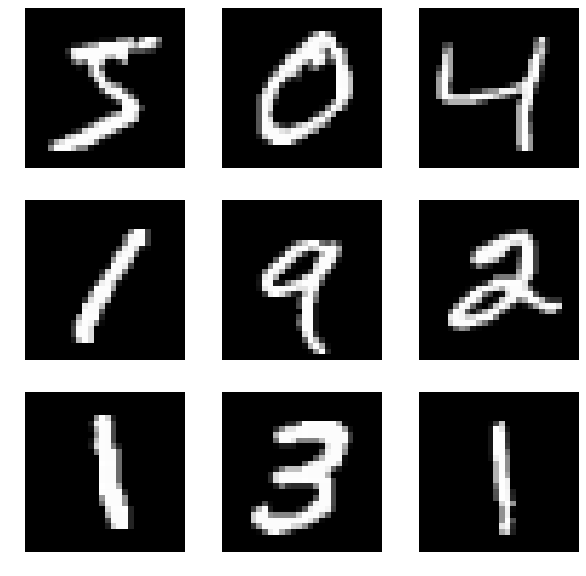

In [19]:
(X_train, y_train), (X_test,y_test)=Get_data()
print('Training shape: {}\nTest shape:{}'.format(X_train.shape[0], X_test.shape[0]))
PlotDigits(X_train)

**Normalization**

In [20]:
X_train.mean() , X_train.std()

(33.318447, 78.567444)

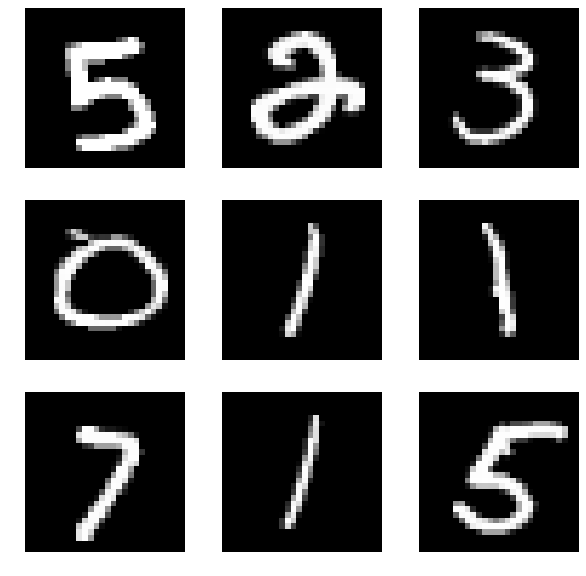

[5 2 3 0 1 1 7 1 5]


In [21]:
# Definir o ImageDataGenerator e ajustar os parametros dos dados
dadaGen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
dadaGen.fit(X_train)
                             
# Definir o ImageDataGenerator e ajustar os parametros dos dados
generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)

In [22]:
X_batch.mean() , X_batch.std()

(-0.050686136, 0.94668853)

**Clareamento ZCA**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


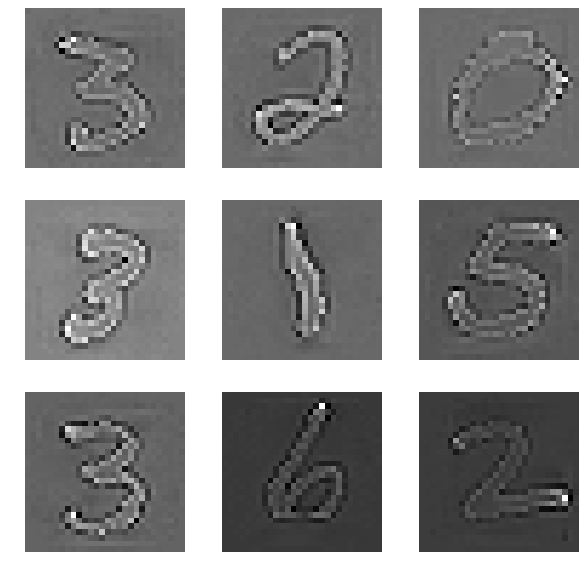

[3 2 0 3 1 5 3 6 2]


In [23]:
dadaGen = ImageDataGenerator(zca_whitening=True)
dadaGen.fit(X_train)
                             
generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)    

**Random Rotations**

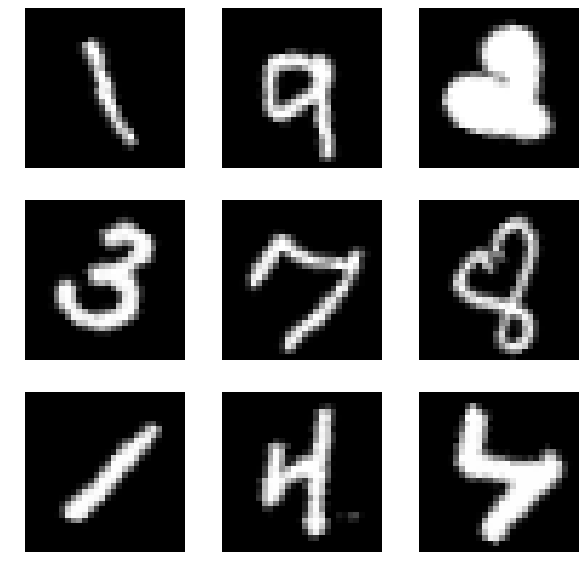

[1 9 2 3 7 8 1 4 4]


In [24]:
dadaGen = ImageDataGenerator(rotation_range=40)
dadaGen.fit(X_train)

generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)    

**Random Flips**

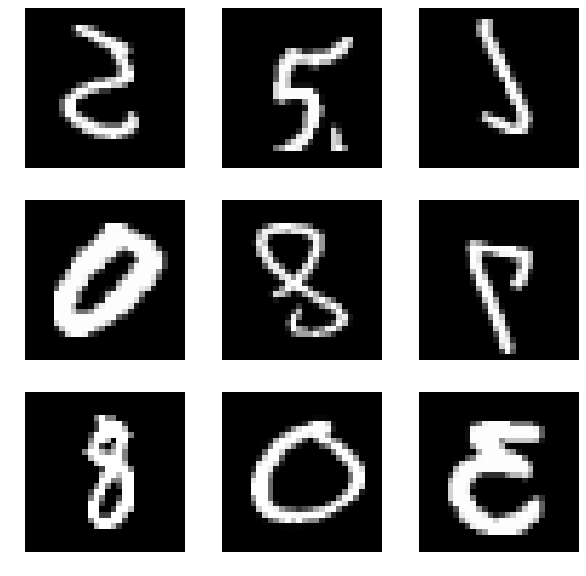

[5 5 7 0 8 7 8 0 3]


In [25]:
dadaGen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
dadaGen.fit(X_train)

generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)    

# Exemplo:

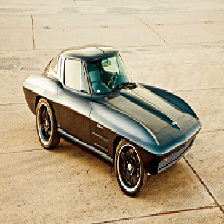

In [26]:
img_path = 'data/Chevrolet.jpg'
#img_path = 'data/harley.jpg'
imagem=load_img(img_path, target_size=(224,224,3));imagem

In [27]:
# Transformando a imagem para um tipo array
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,224,224,3));img_array.shape

(1, 224, 224, 3)

In [0]:
dadaGen = ImageDataGenerator(rotation_range=40,\
                             width_shift_range=0.2,\
                             height_shift_range=0.2,\
                             shear_range=0.1,\
                             zoom_range=0.01,\
                             horizontal_flip=True)

bashDados=dadaGen.flow(img_array, batch_size=1,save_to_dir='../results', save_prefix='fig', save_format='jpeg')

Criamos a pasata results em caso ela não exista:

In [0]:
!mkdir -p ../results

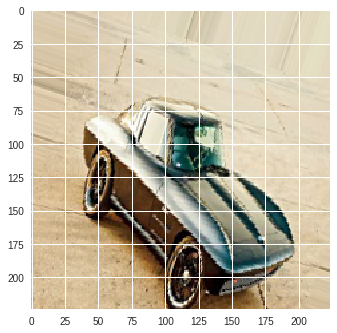

In [33]:
out = next(bashDados)
plt.imshow(out[0].astype(np.int32))